In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px 

In [3]:
#import all files

employee = pd.read_csv("employee.csv")
edu_level = pd.read_csv("education_level.csv")

In [4]:
#get info anad brief summary on each dataset and set index to its primary key

print(employee.head())
print(employee.info())
print(employee.describe())

#check for duplicated
employe = employee.duplicated()
employe.sum()
employee.shape

  EmployeeID   FirstName LastName      Gender  Age BusinessTravel  \
0  3012-1A41    Leonelle    Simco      Female   30    Some Travel   
1  CBCB-9C9D     Leonerd    Aland        Male   38    Some Travel   
2  95D7-1CE9       Ahmed    Sykes        Male   43    Some Travel   
3  47A0-559B  Ermentrude   Berrie  Non-Binary   39    Some Travel   
4  42CC-040A       Stace   Savege      Female   29    Some Travel   

        Department  DistanceFromHome (KM) State                Ethnicity  ...  \
0            Sales                     27    IL                    White  ...   
1            Sales                     23    CA                    White  ...   
2  Human Resources                     29    CA  Asian or Asian American  ...   
3       Technology                     12    IL                    White  ...   
4  Human Resources                     29    CA                    White  ...   

   MaritalStatus  Salary StockOptionLevel OverTime    HireDate  Attrition  \
0       Divorced  102

(1470, 23)

In [5]:
#get info on the education.csv data

print(edu_level.head())
print(edu_level.info())

   EducationLevelID            EducationLevel
0                 1  No Formal Qualifications
1                 2               High School
2                 3                 Bachelors
3                 4                   Masters
4                 5                 Doctorate
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   EducationLevelID  5 non-null      int64 
 1   EducationLevel    5 non-null      object
dtypes: int64(1), object(1)
memory usage: 208.0+ bytes
None


In [6]:
#EDA on attrition rate

employee.Attrition.value_counts()/len(employee)*100

No     83.877551
Yes    16.122449
Name: Attrition, dtype: float64

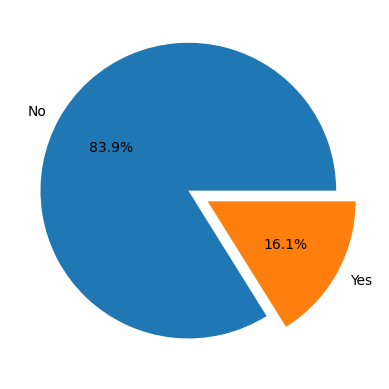

In [7]:
df = employee.groupby('Attrition')['Attrition'].count()
plt.pie(df, explode=[0.05, 0.1], labels=['No', 'Yes'], radius=1.0, autopct='%1.1f%%', shadow=False);


In [8]:
#  attrition column as target variable, Yes = 1, No = 0

def yes_no_to_1_0(value):
    if value == 'Yes':
        return 1
    elif value == 'No':
        return 0
    else:
        return value
    
#apply function to attrition column
df_att = employee['Attrition'].map(yes_no_to_1_0)
print(df_att.head(2))

#total number of attriton
tot_att = df_att.sum()
print(tot_att)

#total currrent employee working
curr_emp = employee['EmployeeID'].count() - tot_att
print(curr_emp)

#insert new column into employee table
employee['attrition'] = df_att

0    0
1    0
Name: Attrition, dtype: int64
237
1233


Gender
Female               675
Male                 651
Non-Binary           124
Prefer Not To Say     20
Name: Gender, dtype: int64


Text(0.5, 1.0, 'Gender ratio')

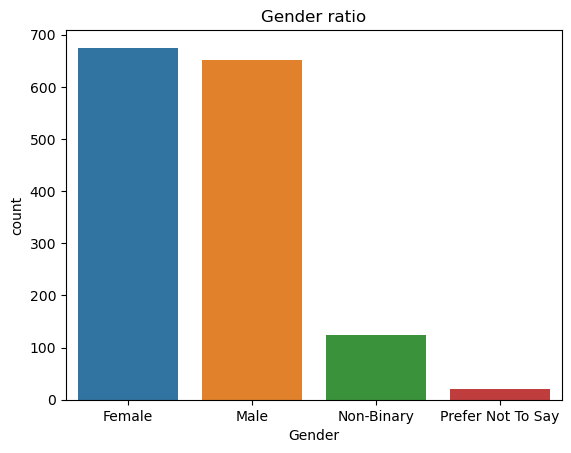

In [9]:
#gender ratio in the organization
df_g=employee.groupby('Gender')['Gender'].count()
print(df_g)

#visualize
sns.countplot(data = employee, x='Gender')
plt.title('Gender ratio')

In [10]:
#attrition based on Gender

employee.groupby('Gender')['attrition'].mean().to_frame()

,attrition
Gender,
Female,0.154074
Male,0.175115
Non-Binary,0.153226
Prefer Not To Say,0.000000


In [11]:
#create a monthly income column from salary
employee['monthlyincome'] = monthlyincome = employee['Salary'] / 12

#Attrition based on their monthly income
employee.groupby(['Gender', 'attrition'])['monthlyincome'].mean().to_frame()

monthlyincome
Gender            attrition               
Female            0           10103.004962
                  1            6154.488782
Male              0            9730.863128
                  1            7353.119883
Non-Binary        0            9568.923016
                  1            7702.631579
Prefer Not To Say 0           10673.612500

In [12]:
#attrition count by Gender

employee.groupby(['Gender', 'attrition'])['Gender'].count().to_frame()

Gender
Gender            attrition        
Female            0             571
                  1             104
Male              0             537
                  1             114
Non-Binary        0             105
                  1              19
Prefer Not To Say 0              20

                 Department
Department                 
Human Resources          63
Sales                   446
Technology              961


Text(0.5, 1.0, 'department count')

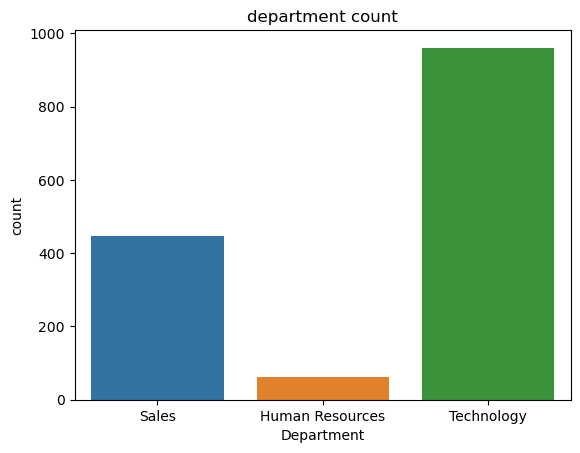

In [13]:
#employee per department
df_d=employee.groupby('Department')['Department'].count().to_frame()
print(df_d)

#visualize
sns.countplot(data=employee, x='Department')
plt.title('department count')

In [14]:
employee.groupby('Department')['attrition'].mean().to_frame().sort_values('attrition', ascending=False)

,attrition
Department,
Sales,0.206278
Human Resources,0.190476
Technology,0.138398


In [15]:
#attrition count by department

employee.groupby(['Department', 'attrition'])['Department'].count().to_frame()

Department
Department      attrition            
Human Resources 0                  51
                1                  12
Sales           0                 354
                1                  92
Technology      0                 828
                1                 133

In [16]:
#how many employee were employed per field

employee.groupby('EducationField')['EducationField'].count().to_frame()

,EducationField
EducationField,
Business Studies,94
Computer Science,440
Economics,101
Human Resources,27
Information Systems,363
Marketing,325
Other,82
Technical Degree,38


In [17]:
employee.groupby('EducationField')['attrition'].mean().to_frame().sort_values('attrition', ascending=False)

,attrition
EducationField,
Technical Degree,0.315789
Human Resources,0.259259
Business Studies,0.212766
Marketing,0.200000
Economics,0.158416
Other,0.134146
Computer Science,0.134091
Information Systems,0.129477


In [18]:
#attrition by job role in the company

eddy = employee.groupby('JobRole')['attrition'].mean().to_frame().sort_values('attrition', ascending=False)
eddy.head()

,attrition
JobRole,
Sales Representative,0.397590
Recruiter,0.375000
Data Scientist,0.237548
Sales Executive,0.174312
Software Engineer,0.159864


In [43]:
 employee.groupby(['JobRole', 'attrition'])['JobRole'].count().to_frame()


JobRole
JobRole                   attrition         
Analytics Manager         0               49
                          1                3
Data Scientist            0              199
                          1               62
Engineering Manager       0               73
                          1                2
HR Business Partner       0                7
HR Executive              0               25
                          1                3
HR Manager                0                4
Machine Learning Engineer 0              136
                          1               10
Manager                   0               35
                          1                2
Recruiter                 0               15
                          1                9
Sales Executive           0              270
                          1               57
Sales Representative      0               50
                          1               33
Senior Software Engineer  0              123
                          1                9
Software Engineer         0              247
                          1               47

In [19]:
#attrition by jobrole based on salary

employee.groupby(['JobRole', 'attrition'])['monthlyincome'].mean().to_frame()



monthlyincome
JobRole                   attrition               
Analytics Manager         0           28784.227891
                          1           30334.833333
Data Scientist            0            4802.715243
                          1            4257.881720
Engineering Manager       0           23545.696347
                          1           35139.916667
HR Business Partner       0           26166.869048
HR Executive              0            7387.953333
                          1           11826.638889
HR Manager                0           37444.229167
Machine Learning Engineer 0           10928.809436
                          1            9735.141667
Manager                   0           26324.964286
                          1           28840.166667
Recruiter                 0            3277.511111
                          1            2903.592593
Sales Executive           0            9552.320062
                          1           10779.859649
Sales Representative      0            3619.773333
                          1            3036.916667
Senior Software Engineer  0           10369.120596
                          1           12485.824074
Software Engineer         0            4524.210189
                          1            3313.039007

<AxesSubplot:xlabel='Department', ylabel='DistanceFromHome (KM)'>

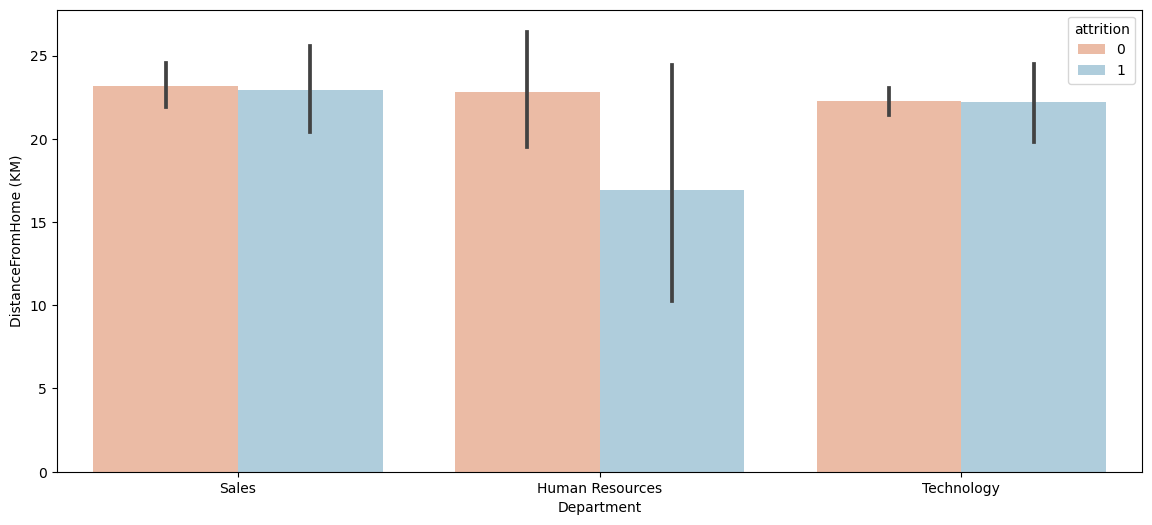

In [21]:
#does distance affect attrition
palete = sns.color_palette("RdBu", n_colors=2)

plt.figure(figsize = (14, 6))
sns.barplot(x='Department', y='DistanceFromHome (KM)', data=employee, hue='attrition', palette= palete)

In [22]:
#attrition based on age
employee.groupby('attrition')['Age'].mean()

attrition
0    29.460665
1    26.540084
Name: Age, dtype: float64

attrition
0    AxesSubplot(0.125,0.11;0.775x0.77)
1    AxesSubplot(0.125,0.11;0.775x0.77)
Name: Age, dtype: object

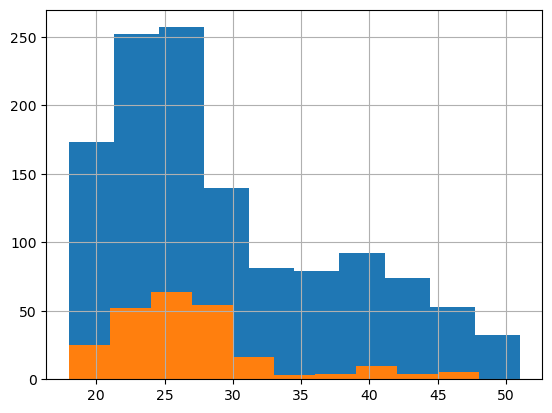

In [31]:
employee.groupby('attrition').Age.hist(bins=10)

In [23]:
#attrition by ethnicity

employee.groupby(['Ethnicity', 'attrition'])['monthlyincome'].mean().to_frame().sort_values(['attrition', 'monthlyincome'], ascending=False)

,,monthlyincome
Ethnicity,attrition,
American Indian or Alaska Native,1,10712.159091
White,1,7706.887470
Native Hawaiian,1,6267.930556
Asian or Asian American,1,5509.967593
Mixed or multiple ethnic groups,1,5086.231771
Black or African American,1,4732.478495
Other,1,2370.958333
Native Hawaiian,0,10607.658333
Black or African American,0,10161.039773


In [24]:
#using the education table value, create a function of educational level

def edu(level):
    if level == 1:
        return 'No formal Qualification'
    elif level == 2:
        return 'High school'
    elif level == 3:
        return 'Bachelors'
    elif level == 4:
        return 'Masters'
    else:
        return 'Doctorate'
    
#insert
ddf = employee['Education'].map(edu)

#insert as a column
employee['education_new'] = ddf

print(employee['education_new'].head(3))

0    Doctorate
1      Masters
2      Masters
Name: education_new, dtype: object


In [25]:
employee.groupby('education_new')['attrition'].mean().to_frame().sort_values('attrition', ascending=False)

,attrition
education_new,
No formal Qualification,0.182353
Bachelors,0.173077
High school,0.156028
Masters,0.145729
Doctorate,0.104167


In [40]:
employee.groupby(['education_new', 'attrition'])['attrition'].count().to_frame()

attrition
education_new           attrition           
Bachelors               0                473
                        1                 99
Doctorate               0                 43
                        1                  5
High school             0                238
                        1                 44
Masters                 0                340
                        1                 58
No formal Qualification 0                139
                        1                 31

In [26]:
employee.groupby('education_new')['monthlyincome'].mean().to_frame().sort_values('monthlyincome')

,monthlyincome
education_new,
No formal Qualification,7915.290196
High school,8765.044622
Bachelors,9617.119172
Masters,9803.421482
Doctorate,12855.732639


In [27]:
#is loyalty based on Years at the company?

employee.groupby('YearsAtCompany')['attrition'].mean().to_frame().sort_values('attrition', ascending=False)

,attrition
YearsAtCompany,
1,0.344633
0,0.315789
2,0.201613
5,0.173913
3,0.162162
4,0.116279
6,0.108911
7,0.074380
8,0.050420
